## Devon Richtsmeier
## PHYS 555 - Machine Learning

## Initial data selection and evaluation


### Import the necessary Python packages including:
* numpy for the array capabilities
* pandas for data visualization and manipulation
* matplotlib for plotting
* scikit-learn for its data processing and feature extraction

In [1]:
import sys
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

sns.set_style('whitegrid')

# Classification data

According to the 2019 Canadian Cancer Statistics (cancer.ca/statistics), breast cancer is slated to be the second most leading cause of cancer in Canada in the coming years, and the first leading cause among women. For those with suspected cases of breast cancer, on option for determining the type and severity of the cancer is through fine needle aspiration (FNA) biopsy (https://www.cancer.org/cancer/breast-cancer/screening-tests-and-early-detection/breast-biopsy/fine-needle-aspiration-biopsy-of-the-breast.html). FNA is conducted using a thin needle, often guided by ultrasound, to extract a small amount of tissue or fluid from the suspected area or lump in the breast. The cells from the tissue, or fluid, can then be analyzed under by a pathologist under a microscope for nucleic abnormalities or other signs indicating whether the mass is malignant or benign. While both types can be serious, malignant tumors are more serious as they have the potential to spread to the rest of the body. Different treatment options are used for the different types, and thus it is important to determine what type each patient has. The issue with FNA is that the pathologist could make a mistake as the samples are analyzed by eye or miss a few cells that could make the difference between no cancer and cancer, or between benign and malignant. For this, machine learning can often perform the same tasks on the images taken from the microscope as the pathologist would, but more quickly and potentially with a greater reliability. This could offer a great outcome for patient care.

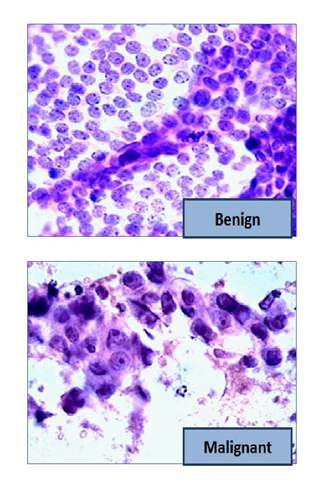
Ahmad et al. 2013 13th International Conference on Intelligent Systems Design and Applications. 

The classification data I'm interested in is a breast cancer data set from breast cancer patients that had either diagnosis of benign (B) or malignant (M) cancer. The features defined in the data set were taken from FNA microscope images and characterize the cell nuclei that are present in the image. There are 569 rows (number of patients) of data with 31 columns, or features, not including the patient ID. 357 patients had benign cases and 212 patients had malignant cases. There are 30 features, excluding the binary malignant or benign classification. In actuality there are 10 features, and each of them has been split into three separate features. For example, one feature is the radius and it has be split into the mean radius, the standard error of the radius measurements, and the mean of the three worst radius measurements. Each feature has been split in the same way. 

The ten features are defined as follows:
* radius: mean of the distances from the center of the nuclei to the perimeter
* texture: the standard deviation of the gray-scale pixel values of the nuclei
* perimeter: the perimeter of the nuclei
* area: the area of the nuclei
* smoothness: local variation in the radius lengths
* compactness: $perimeter^2$ $/$ $area - 1.0$
* concavity: severity of the concave portions of the contour of the nuclei
* concave points: the number of concave portions of the contour of the nuclei
* symmetry: symmetry of the nuclei
* fractal dimension: $"coastline$ $approximation" - 1.0$

The data set can be found at the following address: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
And originally from the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29


The columns of the data are as follows:
* id
* diagnosis
* radius_mean
* texture_mean
* perimeter_mean
* area_mean
* smoothness_mean
* compactness_mean
* concavity_mean
* concave_points_mean
* symmetry_mean
* fractal_dimension_mean
* radius_se
* texture_se
* perimeter_se
* area_se
* smoothness_se
* compactness_se
* concavity_se
* concave_points_se
* symmetry_se
* fractal_dimension_se
* radius_worst
* texture_worst
* perimeter_worst
* area_worst
* smoothness_worst
* compactness_worst
* concavity_worst
* concave_points_worst
* symmetry_worst
* fractal_dimension_worst

I plan on using the 'diagnosis' as the target, and see how accurately benign or malignant disease can be found. It will also be interesting to see which features are better predicters of the diagnosis and which are not as useful.

In [2]:
# Load the cancer data using pandas
cancer_data = pd.read_csv('breast_cancer.csv')

# Display the first 5 rows of data
cancer_data.head(n=5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Display information about the data to see if cleaning is necessary

In [3]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Look at some descriptive statistics of the data

In [4]:
# Look at the statistics of the columns
cancer_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Set your input and target data

In [5]:
# Set the input and target data
input_can = cancer_data[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
                         'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 
                         'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 
                         'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 
                         'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 
                         'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']].values
target_can = cancer_data[['diagnosis']].values

# Print the shapes of the data to make sure the size is the same (number of rows)
print(f'Input shape: {np.shape(input_can)}')
print(f'Target shape: {np.shape(target_can)}')

Input shape: (569, 30)
Target shape: (569, 1)


## Now, the target is binary, but set to 'B' or 'M', need to set it to 0 or 1.
## B = 0
## M = 1

In [6]:
# Check the number of M and B
print(f'Number of M before: {len(np.squeeze(np.argwhere(target_can == "M")))}')
print(f'Number of B before: {len(np.squeeze(np.argwhere(target_can == "B")))}')
print()

# Set B to 0
target_can[target_can == 'B'] = 0

# Set M to 1
target_can[target_can == 'M'] = 1
print(f'Target shape: {np.shape(target_can)}')

# Check it's the same number afterwards
print(f'Number of M after: {len(np.squeeze(np.argwhere(target_can == 1)))}')
print(f'Number of B after: {len(np.squeeze(np.argwhere(target_can == 0)))}')


Number of M before: 212
Number of B before: 357

Target shape: (569, 1)
Number of M after: 212
Number of B after: 357


## Look at the distribution of the various features before normalization

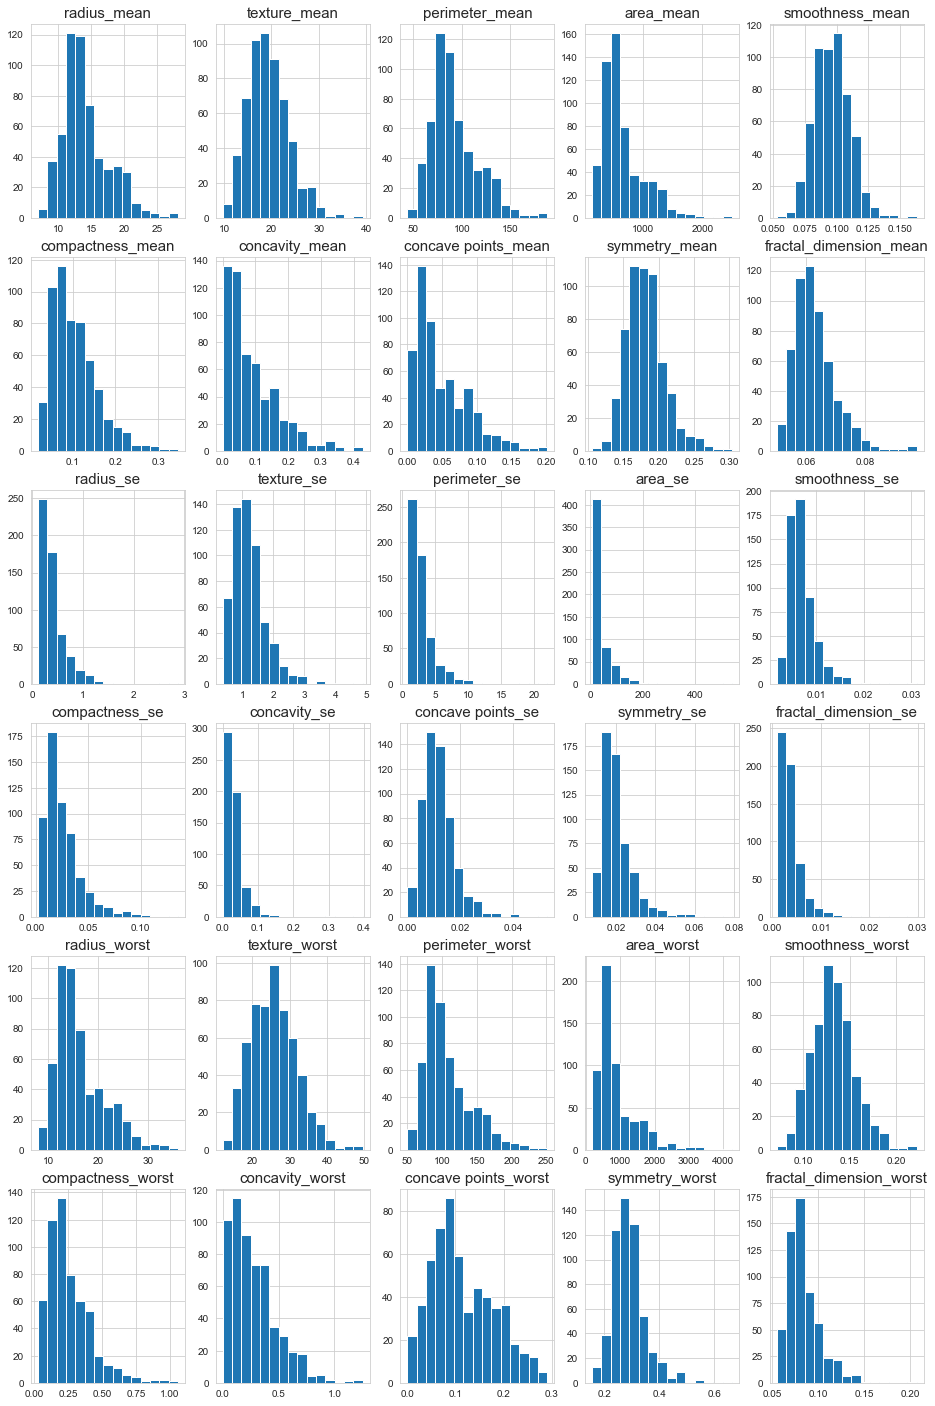

In [7]:
# Show the input distribution
num_plots = 30  # The number of input columns

# The titles for each of the subplots
titles = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
          'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 
          'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 
          'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 
          'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 
          'fractal_dimension_worst']

# Create the figure
fig, axes = plt.subplots(6, 5, figsize=(16, 25))
for i, ax in enumerate(axes.flatten()):
    ax.hist(input_can[:, i], 15)  # Plot the histogram
    ax.set_title(titles[i], fontsize=15)  # Set the title for each subplot
plt.show()

## Normalize the data (the target data is already binary, so there is no need to normalize)

In [122]:
# Apply a standard normalization to the input data
stnd_scaler_can = StandardScaler().fit(input_can)
stnd_scaler_can.fit(input_can)
input_can_stnd = stnd_scaler_can.transform(input_can)

## Show the histograms again after normalization

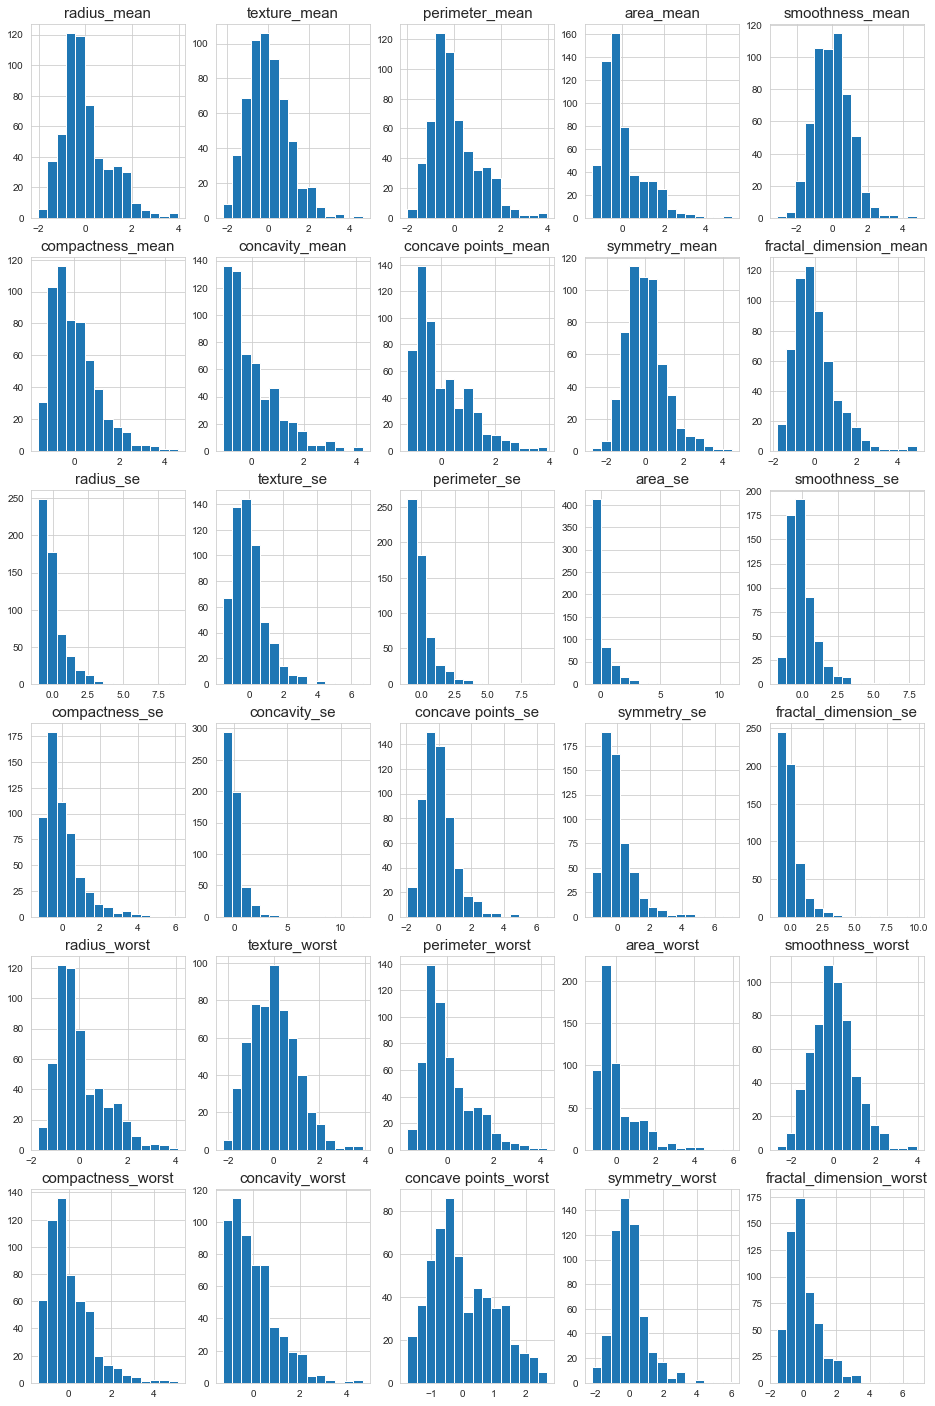

In [123]:
# Create the figure
fig, axes = plt.subplots(6, 5, figsize=(16, 25))
for i, ax in enumerate(axes.flatten()):
    ax.hist(input_can_stnd[:, i], 15)  # Plot the histogram
    ax.set_title(titles[i], fontsize=15)  # Set the title for each subplot
plt.show()